In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

2023-06-21 13:18:53.149941: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pd.set_option('display.max_columns', None)
X=pd.read_csv('output_x_aller_febapr.csv',header=None)
y=pd.read_csv('output_y_aller_febapr.csv',header=None)

In [3]:
X.tail(33)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
80619,101,0,190042,16,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80620,101,0,190042,16,57,1,0,215,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80621,101,0,190042,16,57,1,0,556,0,56,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80622,101,0,190042,16,57,1,0,917,0,56,128,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80623,101,0,190042,16,57,1,0,1067,0,56,128,72,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80624,101,0,190042,16,57,1,0,1462,0,56,128,72,56,185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80625,101,0,190042,16,57,1,0,1918,0,56,128,72,56,185,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80626,101,0,190042,16,57,1,0,2036,0,56,128,72,56,185,154,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80627,101,0,190042,16,57,1,0,2271,0,56,128,72,56,185,154,49,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80628,101,0,190042,16,57,1,0,2512,0,56,128,72,56,185,154,49,53,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
y.tail(33)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
80619,0,56,128,72,56,185,154,49,53,52,213,132,148,45,40,45,123,233,120,88,78,59,84,116,144,81,70,160,70,63,316,130,220,89
80620,-56,0,128,72,56,185,154,49,53,52,213,132,148,45,40,45,123,233,120,88,78,59,84,116,144,81,70,160,70,63,316,130,220,89
80621,-56,-128,0,72,56,185,154,49,53,52,213,132,148,45,40,45,123,233,120,88,78,59,84,116,144,81,70,160,70,63,316,130,220,89
80622,-56,-128,-72,0,56,185,154,49,53,52,213,132,148,45,40,45,123,233,120,88,78,59,84,116,144,81,70,160,70,63,316,130,220,89
80623,-56,-128,-72,-56,0,185,154,49,53,52,213,132,148,45,40,45,123,233,120,88,78,59,84,116,144,81,70,160,70,63,316,130,220,89
80624,-56,-128,-72,-56,-185,0,154,49,53,52,213,132,148,45,40,45,123,233,120,88,78,59,84,116,144,81,70,160,70,63,316,130,220,89
80625,-56,-128,-72,-56,-185,-154,0,49,53,52,213,132,148,45,40,45,123,233,120,88,78,59,84,116,144,81,70,160,70,63,316,130,220,89
80626,-56,-128,-72,-56,-185,-154,-49,0,53,52,213,132,148,45,40,45,123,233,120,88,78,59,84,116,144,81,70,160,70,63,316,130,220,89
80627,-56,-128,-72,-56,-185,-154,-49,-53,0,52,213,132,148,45,40,45,123,233,120,88,78,59,84,116,144,81,70,160,70,63,316,130,220,89
80628,-56,-128,-72,-56,-185,-154,-49,-53,-52,0,213,132,148,45,40,45,123,233,120,88,78,59,84,116,144,81,70,160,70,63,316,130,220,89


In [5]:
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=42)

# Define the model architecture
input_shape = (41, 1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
model.add(tf.keras.layers.GRU(64, return_sequences=False))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(34))

# Compile the model
model.compile(loss='mae', optimizer='adam')

# Train the model
batch_size = 32
epochs = 100

# Initialize lists to store training and validation errors
train_errors = []
val_errors = []


2023-06-21 13:18:58.819215: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
# Initialize early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Initialize lists to store training and validation errors
train_errors = []
val_errors = []

for epoch in range(epochs):
    print('epoch:', epoch)
    
    # Train the model for one epoch
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=1, validation_data=(X_val, y_val), callbacks=[early_stopping])
    
    
    # Calculate MAE for training, validation, and test sets
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    y_val_pred = model.predict(X_val)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Append errors to the respective lists
    train_errors.append(train_mae)
    val_errors.append(val_mae)


epoch: 0
505/505 [==============================] - 2s 4ms/step
epoch: 1
505/505 [==============================] - 2s 4ms/step
epoch: 2
505/505 [==============================] - 2s 4ms/step
epoch: 3
505/505 [==============================] - 2s 4ms/step
epoch: 4
505/505 [==============================] - 2s 4ms/step
epoch: 5
505/505 [==============================] - 3s 5ms/step
epoch: 6
505/505 [==============================] - 2s 4ms/step
epoch: 7
505/505 [==============================] - 2s 4ms/step
epoch: 8
505/505 [==============================] - 2s 4ms/step
epoch: 9
505/505 [==============================] - 2s 5ms/step
epoch: 10
505/505 [==============================] - 2s 4ms/step
epoch: 11
505/505 [==============================] - 2s 4ms/step
epoch: 12
505/505 [==============================] - 2s 4ms/step
epoch: 13
505/505 [==============================] - 2s 4ms/step
epoch: 14
505/505 [==============================] - 2s 4ms/step
epoch: 15
505/505 [================

KeyboardInterrupt: 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


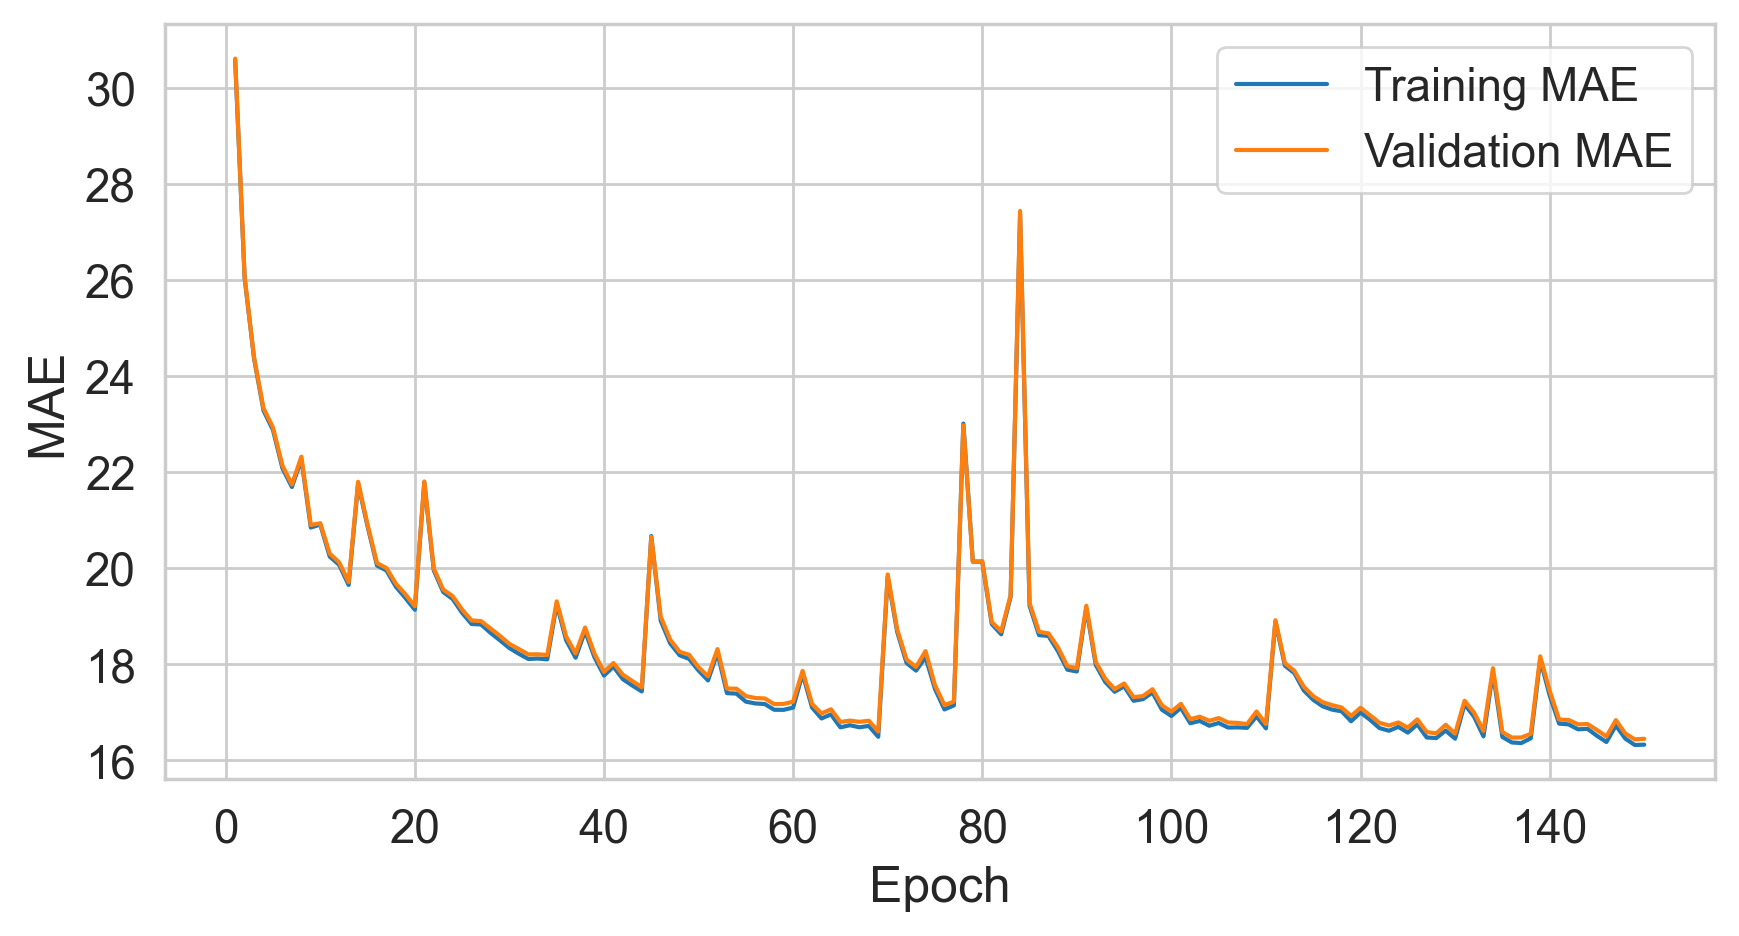

505/505 [==============================] - 2s 5ms/step - loss: 16.2044
Test Loss: 16.20437240600586


In [10]:
# Plot the error evolution
epochs_range = range(1, 151)
plt.figure(1, figsize=(8, 4), dpi=250)
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
sns.lineplot(epochs_range, train_errors[:150], label='Training MAE')
sns.lineplot(epochs_range, val_errors[:150], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


Length of y array: 80652
Selected line index: 17877
2521/2521 [==============================] - 11s 4ms/step


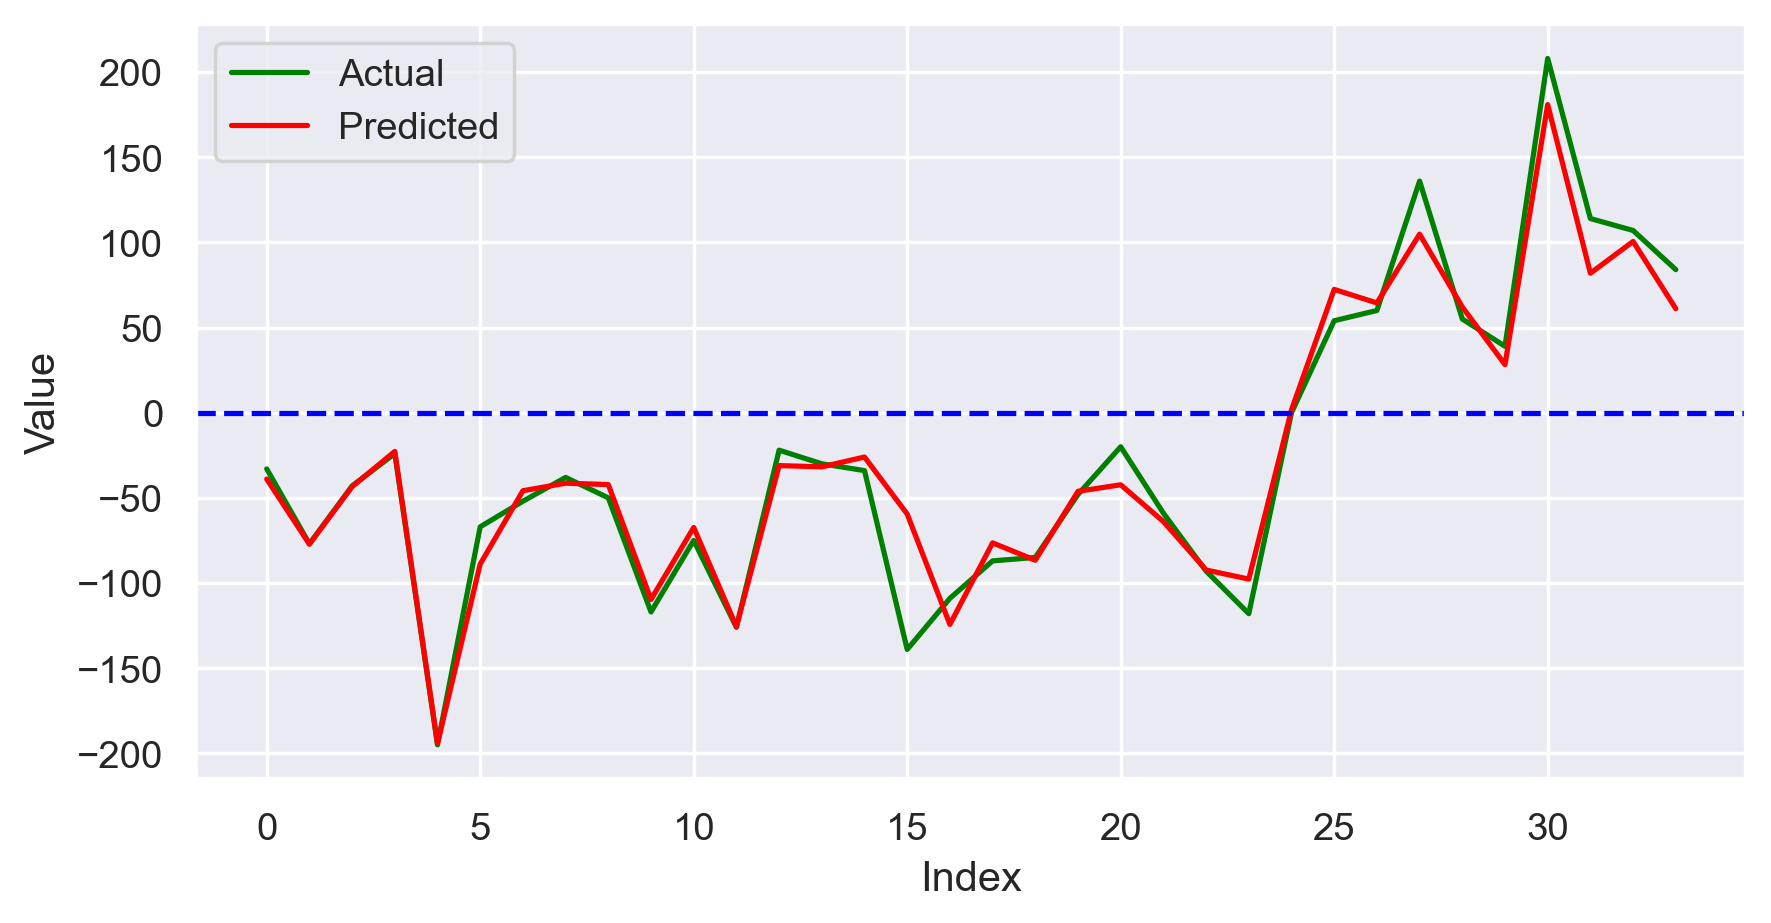

In [11]:
# Select a random line
line_index = random.randint(0, len(y) - 1)
plt.figure(1,(8,4),dpi = 250)
# Print the length of the y array and the line_index
print("Length of y array:", len(y))
print("Selected line index:", line_index)

# Get the actual and predicted values for the selected line
actual_line = y.iloc[line_index]
predicted_line = model.predict(X)[line_index]

# Plot the actual and predicted values using seaborn
sns.set()
plt.plot(actual_line, color='green', label='Actual')
plt.plot(predicted_line, color='red', label='Predicted')

# Add a blue line at y=0
plt.axhline(y=0, color='blue', linestyle='--')

plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()


In [13]:
import numpy as np
from scipy.spatial.distance import cosine

y_test_pred = model.predict(X_test)
y_test = np.array(y_test)  # Convert y_test to a numpy array if it's not already

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_cos = cosine(y_test.flatten(), y_test_pred.flatten())

print('Test MAE:', test_mae)
print('Test RMSE:', test_rmse)
print('Test COS:', test_cos)


505/505 [==============================] - 2s 4ms/step
Test MAE: 16.204371361050804
Test RMSE: 30.090947837052777
Test COS: 0.030709755634088953
